In [1]:
import pandas as pd
sentiment_df = pd.read_csv("sector_sentiment_summary.csv")
sentiment_df.head()


,sector,vader_score,finbert_score
0,Energy,0.071269,-0.303653
1,Healthcare,0.133605,-0.343090
2,Technology,0.090432,-0.452394
3,Consumer Discretionary,0.085194,-0.494001
4,Financials,0.037813,-0.500181


In [2]:
TOP_N = 3  # choose top 3 bullish sectors
USE_THRESHOLD = False  # if is true, only select sectors above a score threshold
FINBERT_THRESHOLD = 0.15  # optional threshold
sorted_sectors = sentiment_df.sort_values("finbert_score", ascending=False)
if USE_THRESHOLD:
    selected_sectors = sorted_sectors[sorted_sectors["finbert_score"] > FINBERT_THRESHOLD]
else:
    selected_sectors = sorted_sectors.head(TOP_N)
selected_sectors


,sector,vader_score,finbert_score
0,Energy,0.071269,-0.303653
1,Healthcare,0.133605,-0.343090
2,Technology,0.090432,-0.452394


In [3]:
# Sorting and filtering top sectors
sorted_sectors = sentiment_df.sort_values("finbert_score", ascending=False)
if USE_THRESHOLD:
    filtered = sorted_sectors[sorted_sectors["finbert_score"] > FINBERT_THRESHOLD]
else:
    filtered = sorted_sectors.head(TOP_N)
# Ensure sector is a column
filtered = filtered.reset_index()
# If index column holds the sector names, rename it
if 'index' in filtered.columns and 'sector' not in filtered.columns:
    filtered = filtered.rename(columns={"index": "sector"})
# Confirm sector column exists
print("Columns:", filtered.columns.tolist())
print("Sample sectors:", filtered["sector"].tolist())
# defining mapping dictionary
sector_to_etf = dict({
    "Technology": "XLK",
    "Financials": "XLF",
    "Healthcare": "XLV",
    "Consumer Discretionary": "XLY",
    "Consumer Staples": "XLP",
    "Energy": "XLE",
    "Industrials": "XLI",
    "Utilities": "XLU",
    "Materials": "XLB",
    "Real Estate": "XLRE",
    "Communication Services": "XLC",
    "Others / Small Cap": "IWM"
})

# Confirmming it is a dict
print("sector_to_etf is a dict:", isinstance(sector_to_etf, dict))
# Map sector to ETF
filtered["etf_ticker"] = filtered["sector"].map(sector_to_etf)
# Dropping rows without ETF matches
selected_sectors = filtered.dropna(subset=["etf_ticker"])
selected_sectors = selected_sectors[["sector", "vader_score", "finbert_score", "etf_ticker"]]
selected_sectors


Columns: ['index', 'sector', 'vader_score', 'finbert_score']
Sample sectors: ['Energy', 'Healthcare', 'Technology']
sector_to_etf is a dict: True


,sector,vader_score,finbert_score,etf_ticker
0,Energy,0.071269,-0.303653,XLE
1,Healthcare,0.133605,-0.343090,XLV
2,Technology,0.090432,-0.452394,XLK


In [4]:
from datetime import datetime
# adding current date
sentiment_df["date"] = pd.to_datetime(datetime.today().date())
# group by sector and date
daily_sector_sentiment = sentiment_df.groupby(['sector', 'date'])['finbert_score'].mean().reset_index()
#pivot to wide format for visualization
sentiment_pivot = daily_sector_sentiment.pivot(index='date', columns='sector', values='finbert_score')

In [5]:
selected_sectors.to_csv("weekly_signals.csv", index=False)
print("Saved selected sector signals to weekly_signals.csv ")

Saved selected sector signals to weekly_signals.csv 


C:\Users\ishwa\AppData\Local\Temp\ipykernel_8496\2818774126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


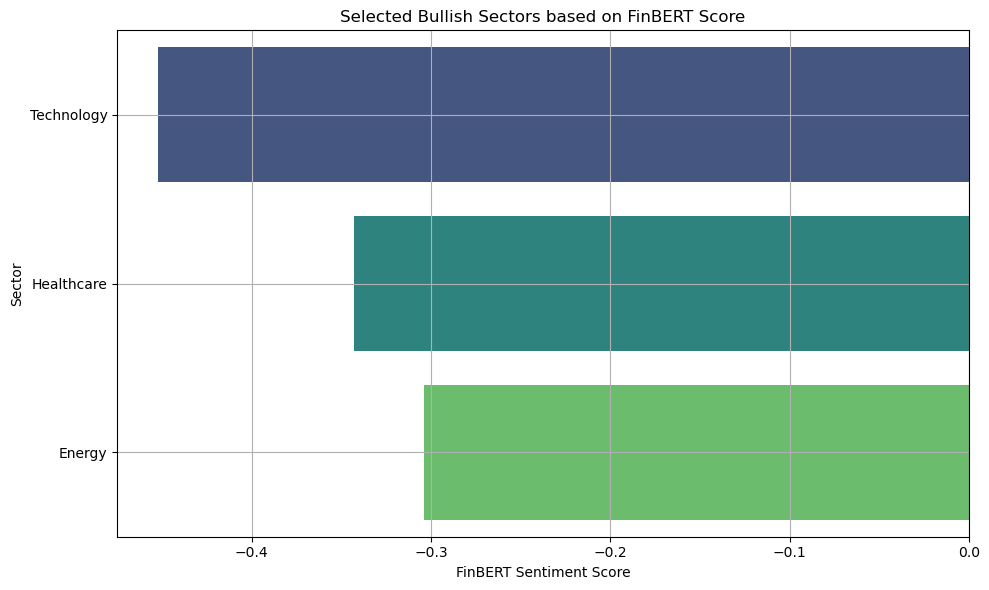

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(
    x="finbert_score",
    y="sector",
    data=selected_sectors.sort_values("finbert_score"),
    palette="viridis"
)
plt.title("Selected Bullish Sectors based on FinBERT Score")
plt.xlabel("FinBERT Sentiment Score")
plt.ylabel("Sector")
plt.grid(True)
plt.tight_layout()
plt.show()
